# Requirements

In [1]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [2]:
df=pd.read_csv('user_behavior_data.csv')

Preprocess the input and the output variables appropriately.

In [4]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'App Usage Time (min/day)'}>,
        <Axes: title={'center': 'Screen On Time (hours/day)'}>],
       [<Axes: title={'center': 'Battery Drain (mAh/day)'}>,
        <Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage (MB/day)'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'User Behavior Class'}>, <Axes: >]],
      dtype=object)

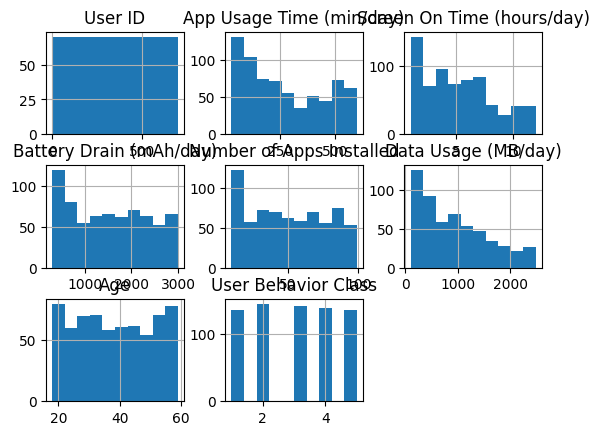

In [5]:
df.hist()

Check if the dataset is balanced.

In [7]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [8]:
(df.isnull().sum()/len(df)*100).reset_index().rename(columns={'index':'feature',0:'%'})

,feature,%
0,User ID,0.0
1,Device Model,0.0
2,Operating System,10.0
3,App Usage Time (min/day),0.0
4,Screen On Time (hours/day),0.0
5,Battery Drain (mAh/day),0.0
6,Number of Apps Installed,0.0
7,Data Usage (MB/day),20.0
8,Age,5.0
9,Gender,0.0


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

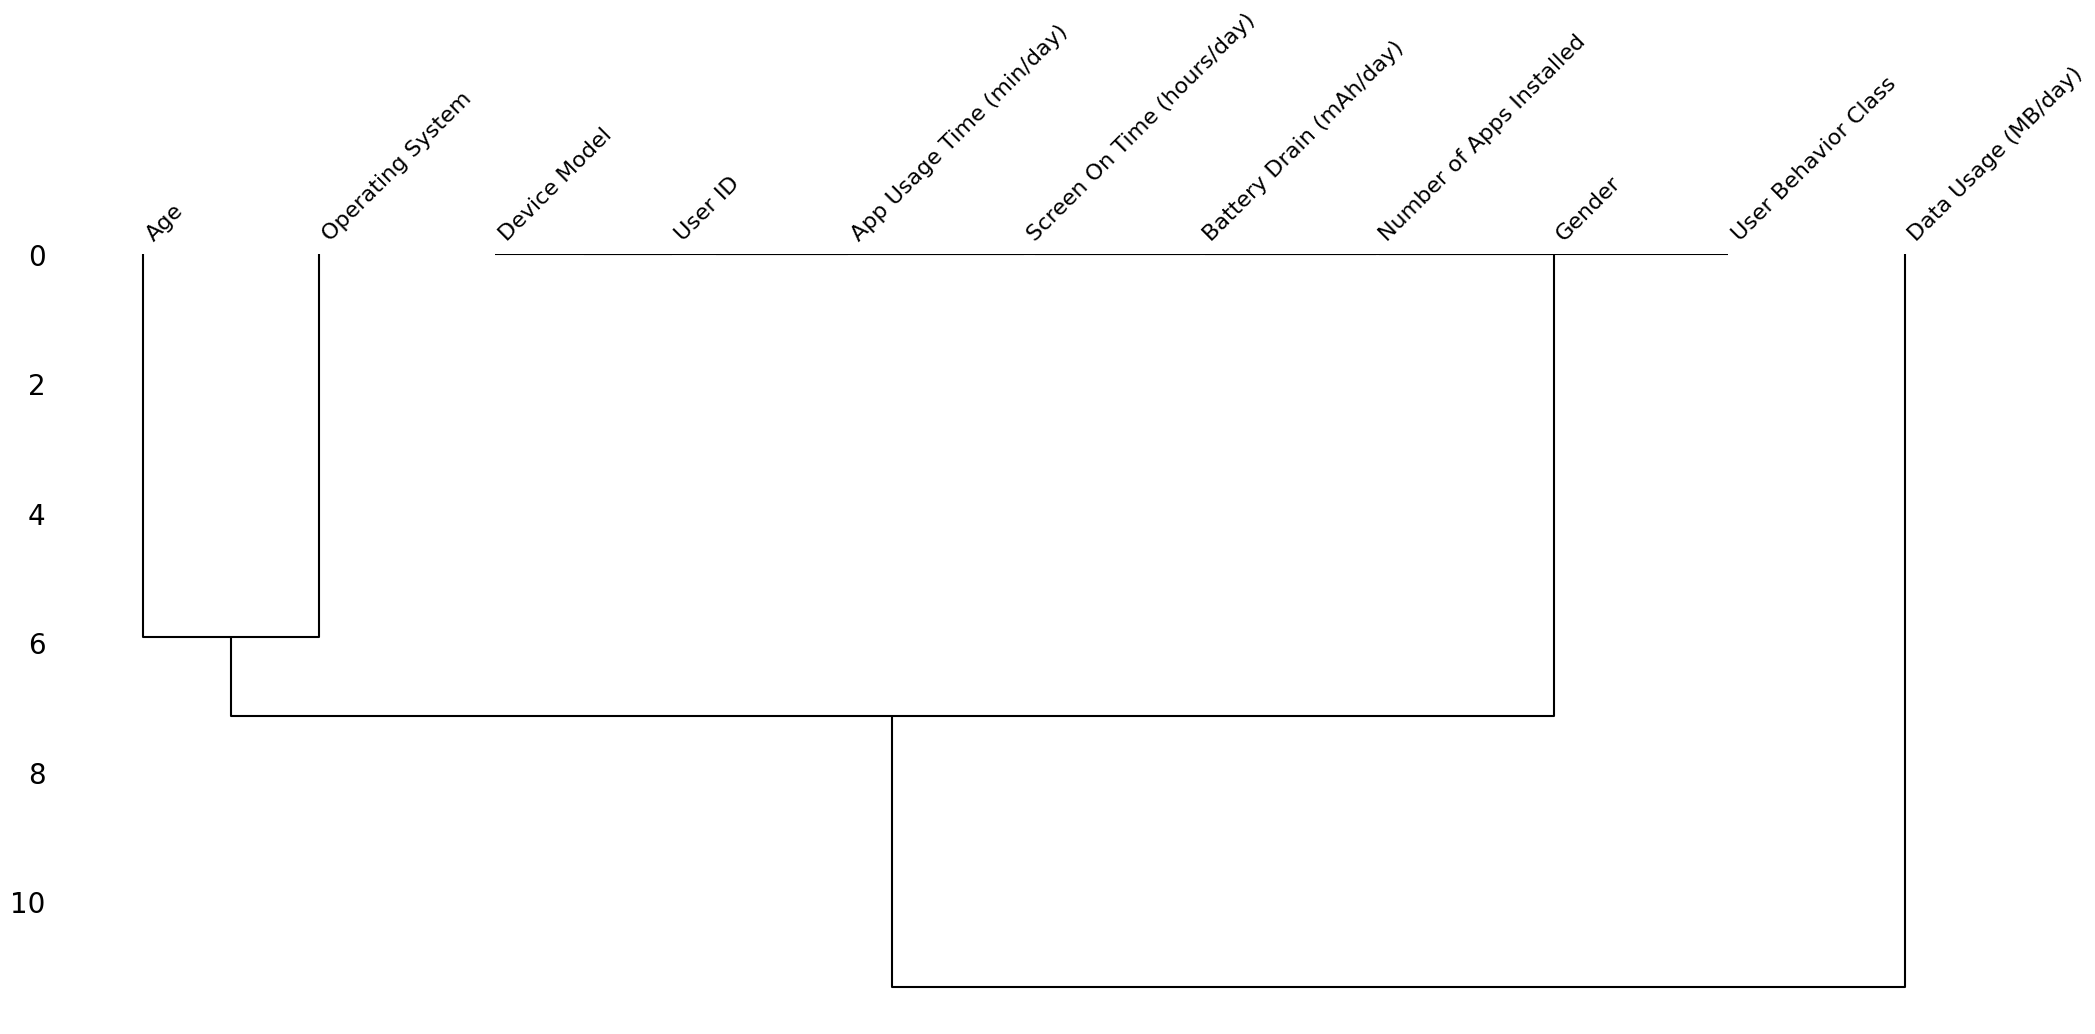

In [9]:
msno.dendrogram(df)

<Axes: >

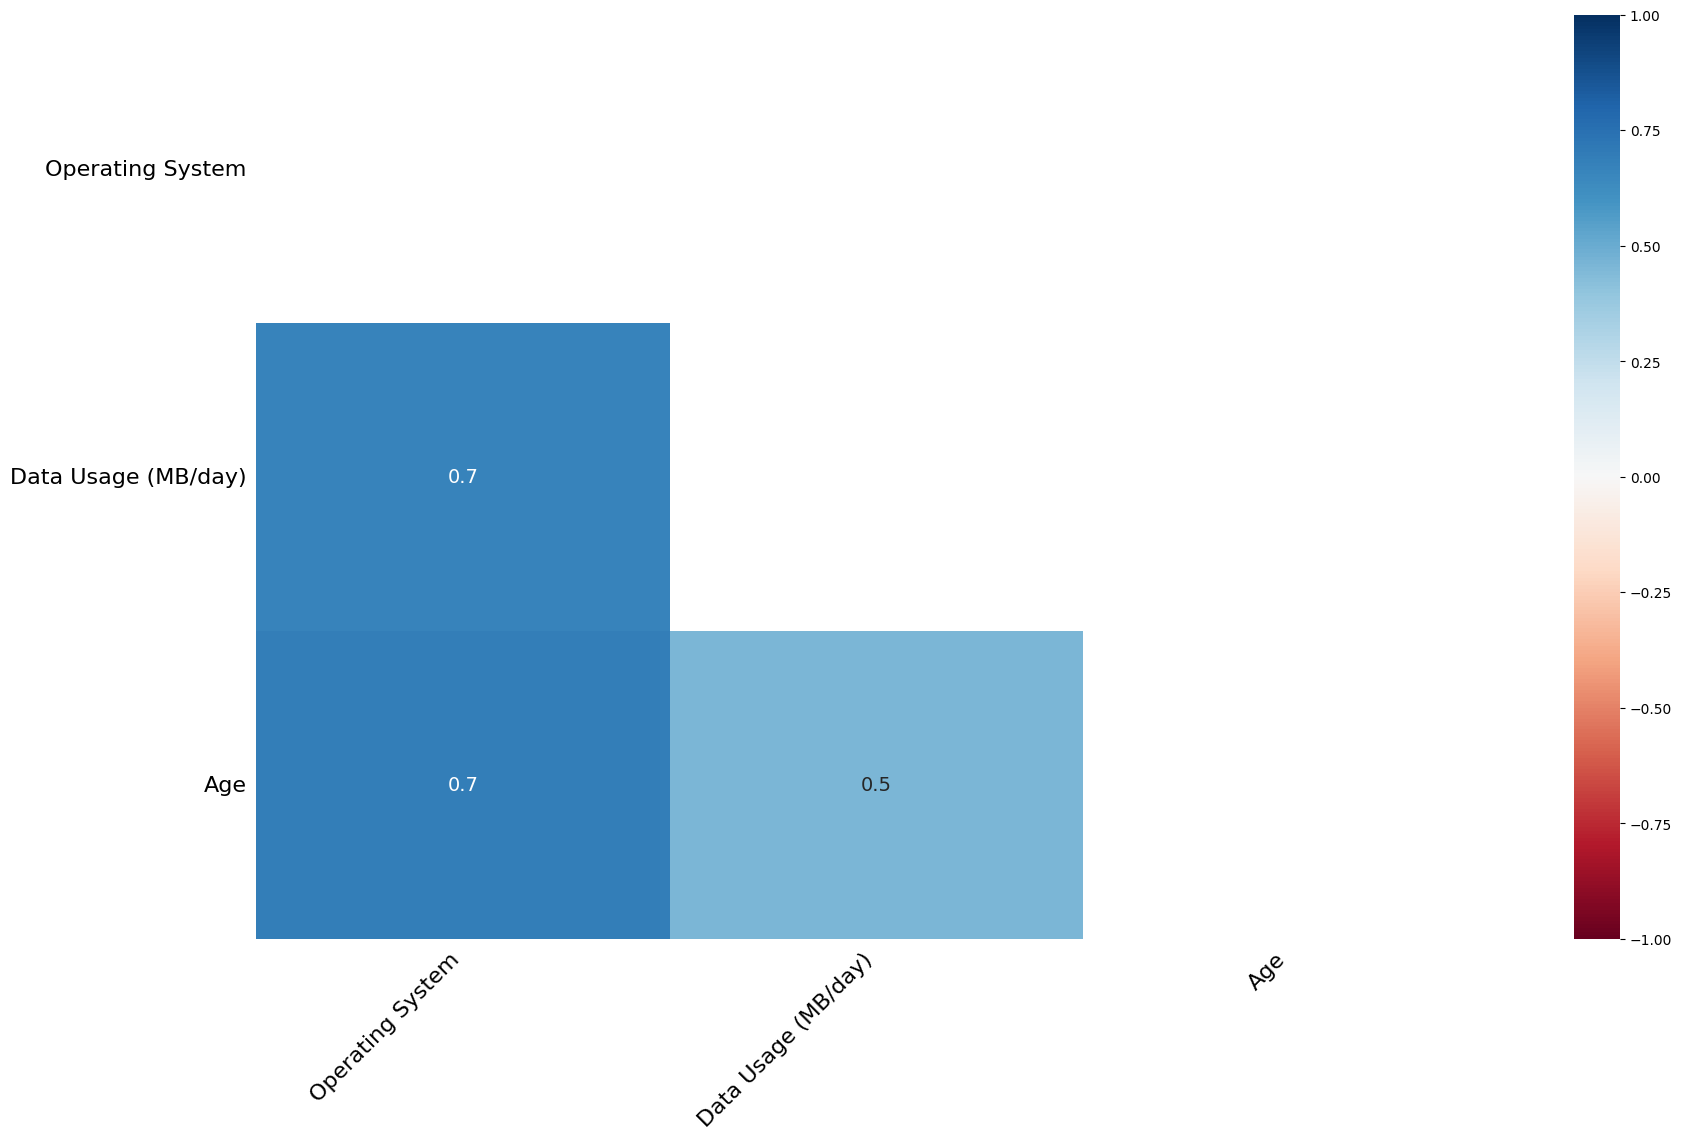

In [11]:
msno.heatmap(df)

<Axes: >

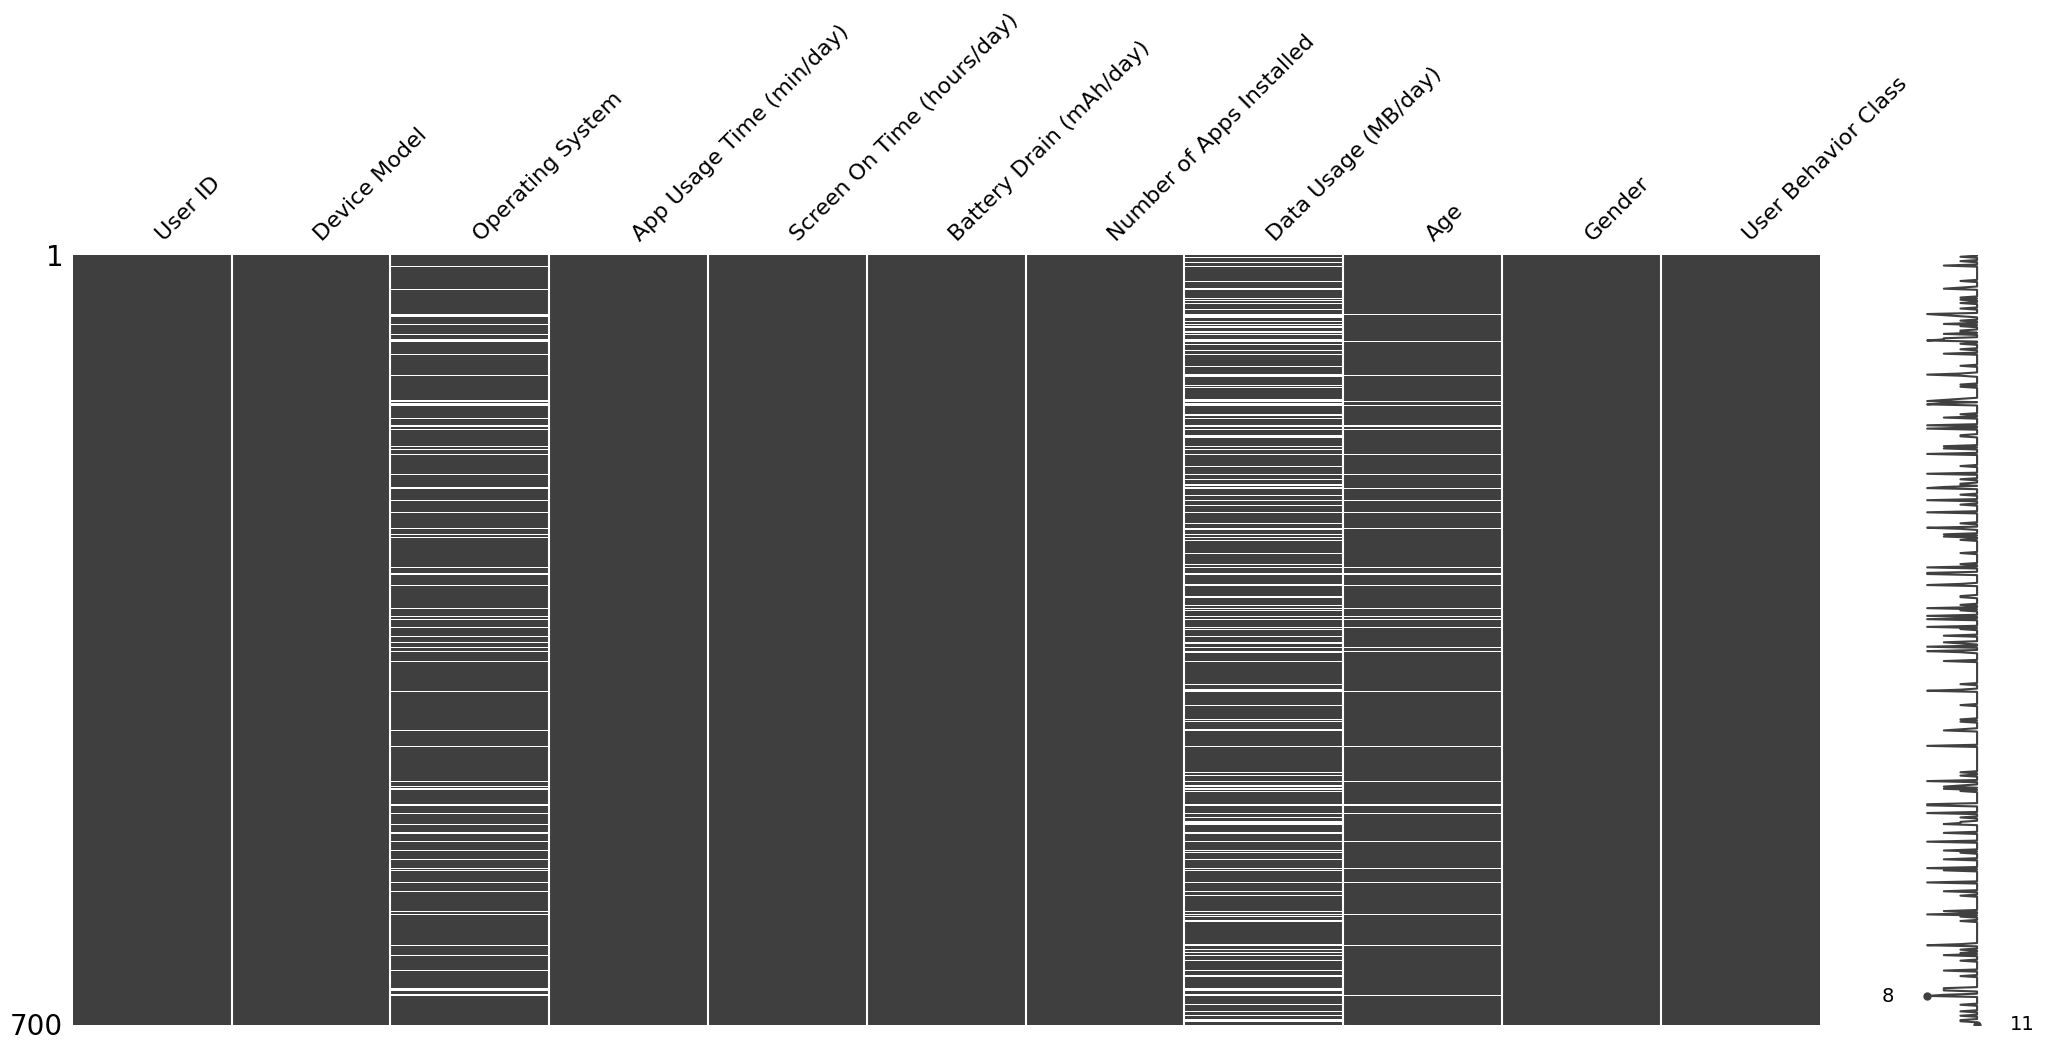

In [12]:
msno.matrix(df)

<Axes: >

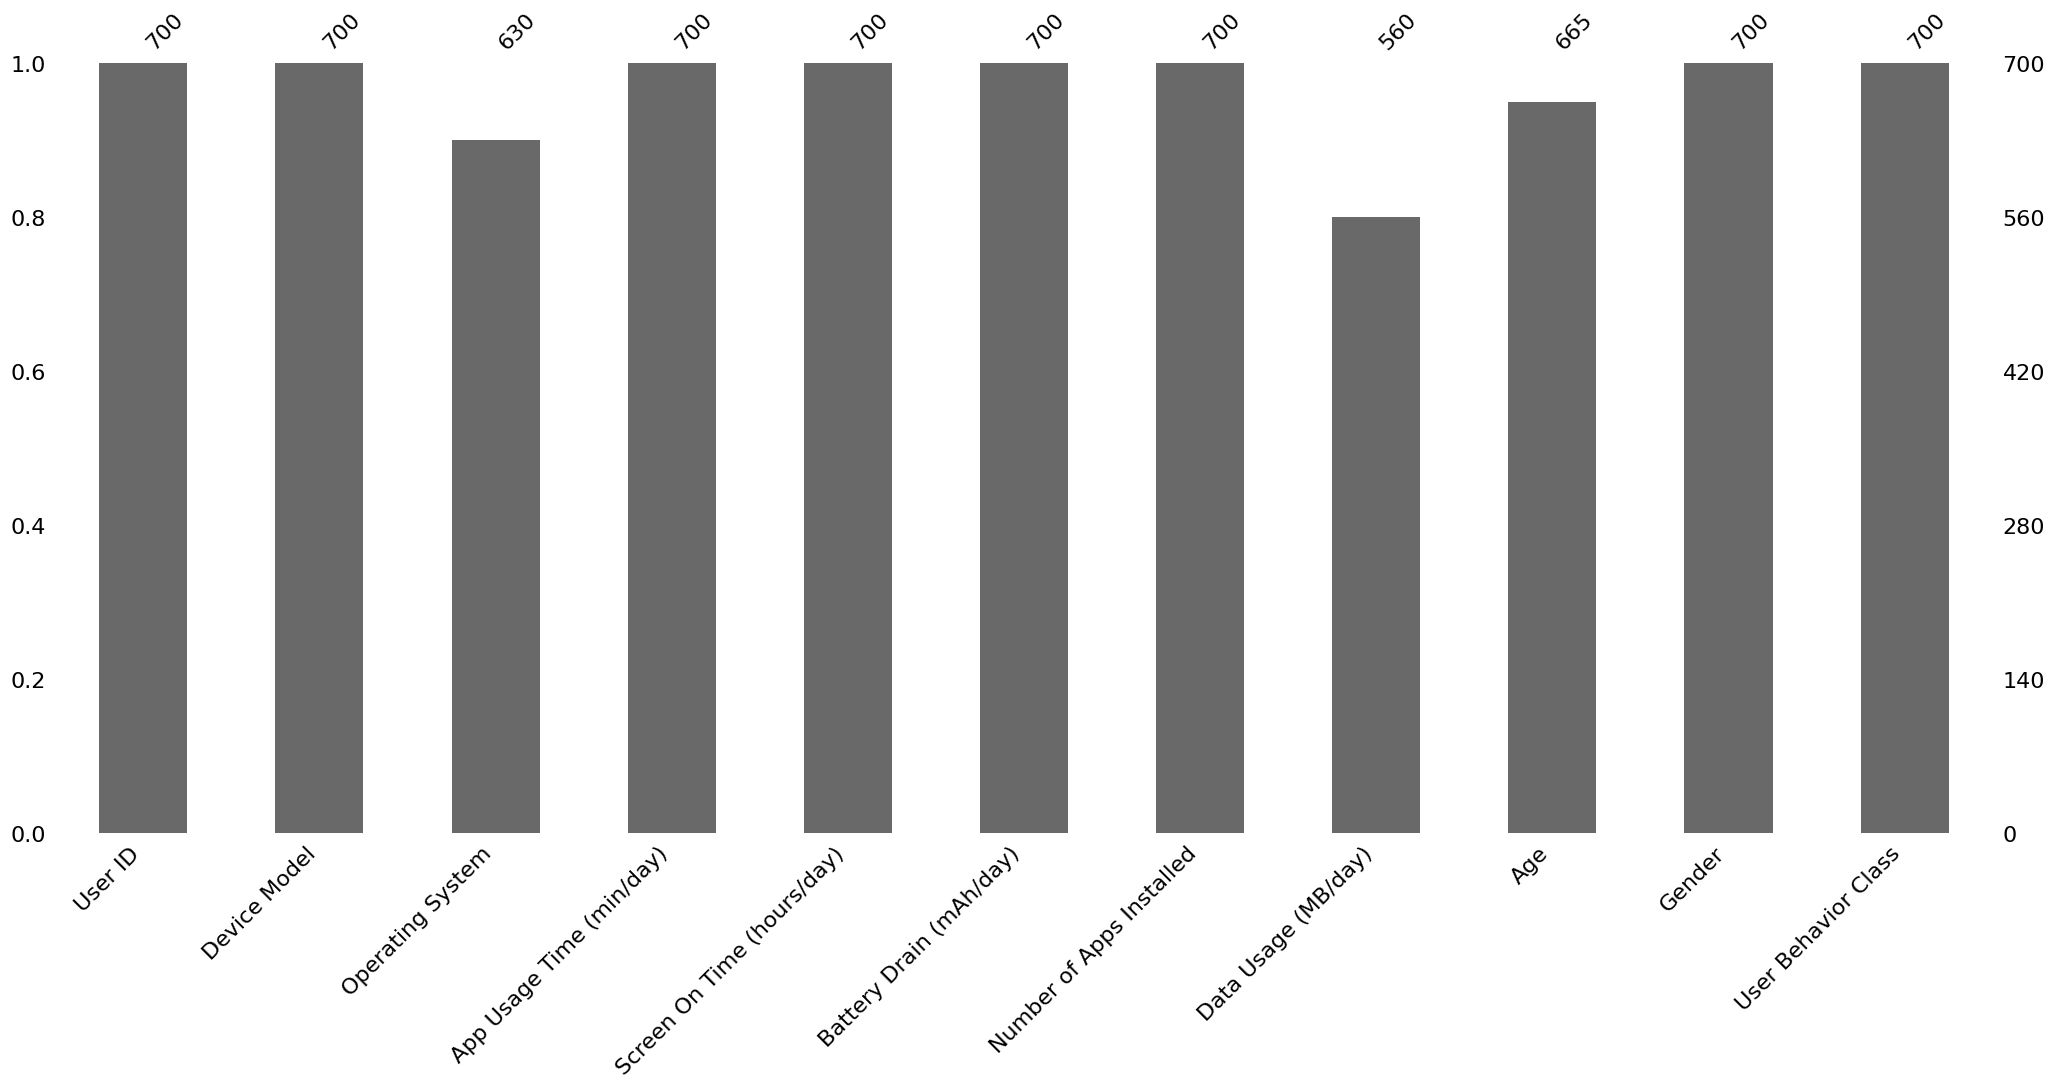

In [13]:
msno.bar(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [15]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


In [27]:
def drop_data(data:pd.DataFrame, columns:list):
  data_copy = data.copy()
  data_copy.drop(columns, axis=1, inplace=True)
  return data_copy
     

def simple_impute_data(data:pd.DataFrame, columns:list, strategy:str):
  imputer = SimpleImputer(strategy=strategy)
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[[column]])
  return data_copy
     

def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

    # if 'nan' in encoder.classes_:
    #   data_copy.loc[data_copy[column] == -1, column] = np.nan
  return data_copy
     

def knn_impute_data(data:pd.DataFrame, columns:list, n_neighbors:int):
   imputer = KNNImputer(n_neighbors=n_neighbors)
   data_copy = data.copy()

   for column in columns:
     data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
   return data_copy

In [30]:
df = drop_data(data=df, columns=['User ID', 'Device Model','Operating System'])
df = simple_impute_data(data=df, columns=['Age','Data Usage (MB/day)'],strategy='mean')
df = label_data(data=df, columns=['Gender'])

In [31]:
df.isnull().sum()

App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [33]:
df.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,393,6.4,1872,67,1122.000000,40.0,1,4
1,268,4.7,1331,42,944.000000,47.0,0,3
2,154,4.0,761,32,942.332143,42.0,1,2
3,239,4.8,1676,56,871.000000,20.0,1,3
4,187,4.3,1367,58,988.000000,31.0,0,3


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [44]:
data=df.copy()

In [45]:
input_data = data.copy()
input_data = drop_data(data=input_data, columns=['User Behavior Class'])
input_data.sample(3)

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
477,258,4.2,1315,44,762.0,59.0,0
506,238,5.1,1408,45,941.0,27.0,1
332,191,6.0,1762,45,904.0,54.0,1


In [46]:
target_data = data.copy()['User Behavior Class']
target_data.sample(3)

99     3
400    5
11     3
Name: User Behavior Class, dtype: int64

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [41]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [49]:
model=RandomForestClassifier()
model.fit(x_train_scaled, Y_train)

RandomForestClassifier()

Use the trained model to make predictions for the test set.

In [51]:
y_pred=model.predict(x_test_scaled)

In [52]:
y_pred

array([3, 4, 5, 1, 1, 1, 3, 3, 3, 2, 1, 4, 3, 2, 1, 2, 4, 3, 2, 1, 1, 4,
       3, 1, 1, 1, 1, 5, 3, 5, 2, 3, 3, 2, 4, 3, 4, 3, 2, 3, 1, 3, 2, 2,
       4, 3, 3, 3, 2, 4, 5, 5, 1, 4, 2, 5, 5, 3, 3, 3, 5, 4, 2, 2, 1, 5,
       4, 3, 3, 2, 3, 1, 5, 4, 3, 2, 5, 1, 1, 1, 1, 5, 2, 4, 2, 2, 1, 3,
       3, 3, 4, 5, 1, 4, 3, 2, 3, 5, 5, 2, 3, 5, 1, 3, 1, 1, 4, 4, 5, 5,
       1, 3, 1, 3, 2, 4, 3, 5, 1, 3, 4, 2, 3, 3, 5, 5, 4, 3, 3, 1, 1, 1,
       1, 1, 2, 1, 3, 2, 1, 2])

Assess the performance of the model by using different classification metrics.

In [53]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.16428571428571428
[[ 4  7 10  1  1]
 [10  5  6  5  5]
 [ 4  6  4  5  4]
 [12  4 10  4  5]
 [ 4  3 10  5  6]]
              precision    recall  f1-score   support

           1       0.12      0.17      0.14        23
           2       0.20      0.16      0.18        31
           3       0.10      0.17      0.13        23
           4       0.20      0.11      0.15        35
           5       0.29      0.21      0.24        28

    accuracy                           0.16       140
   macro avg       0.18      0.17      0.17       140
weighted avg       0.19      0.16      0.17       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [66]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [67]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 700],
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = XGBClassifier(objective="binary:logistic",use_label_encoder=False)
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=1,
    cv=10,
    verbose=0
)
#x_train_scaled=x_train_scaled-1
Y_train=Y_train-1
grid_search.fit(x_train_scaled, Y_train)

D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:37:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "D:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~

KeyboardInterrupt: 

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [68]:
from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_

# Step 4: Evaluate on test data
y_pred = best_model.predict(x_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'